<a href="https://colab.research.google.com/github/susanaescamilla679-coder/Estadistica2025B/blob/main/PROYECTOUNIDAD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


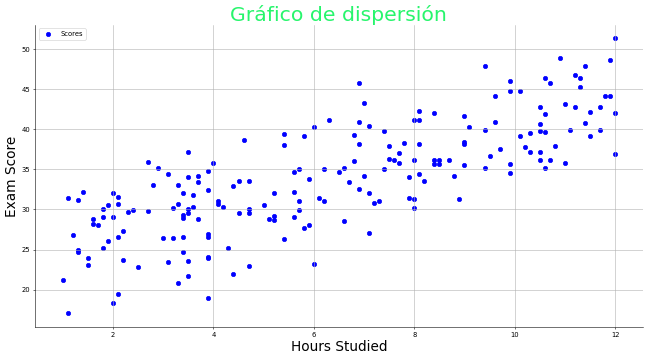

Coeficiente de correlación = 0.7768
Coeficiente de correlación (forma fácil)=                     hours_studied  sleep_hours  attendance_percent  \
hours_studied            1.000000     0.077864           -0.031311   
sleep_hours              0.077864     1.000000            0.000572   
attendance_percent      -0.031311     0.000572            1.000000   
previous_scores          0.069078    -0.194251            0.051958   
exam_score               0.776751     0.188222            0.225713   

                    previous_scores  exam_score  
hours_studied              0.069078    0.776751  
sleep_hours               -0.194251    0.188222  
attendance_percent         0.051958    0.225713  
previous_scores            1.000000    0.431105  
exam_score                 0.431105    1.000000  
Coeficiente de correlación: PearsonRResult(statistic=np.float64(0.7767514349789608), pvalue=np.float64(1.2719809567612592e-41))
Coeficiente de determinación: 0.6033427917418747
Parámetros: const       

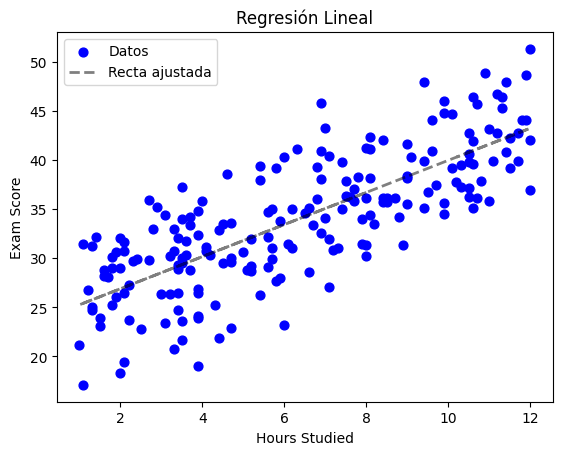


Coeficiente de determinación (R²) = 0.6033

Intervalo de confianza:
                        0          1
const          22.300501  24.936374
hours_studied   1.448421   1.819798


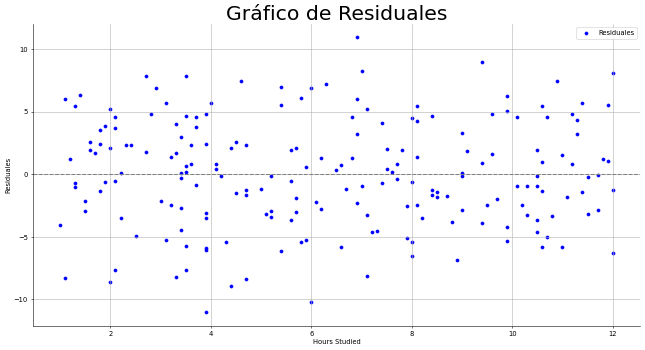

Valor p (Shapiro) = 0.5231100089077523
Valor p de Breusch-Pagan: 0.2986

Predicción para x=5: [31.78898733]
Predicción para x=8: [36.69131702]

ANOVA:
                  df       sum_sq      mean_sq           F        PR(>F)
hours_studied    1.0  5534.762083  5534.762083  301.171566  1.271981e-41
Residual       198.0  3638.732917    18.377439         NaN           NaN


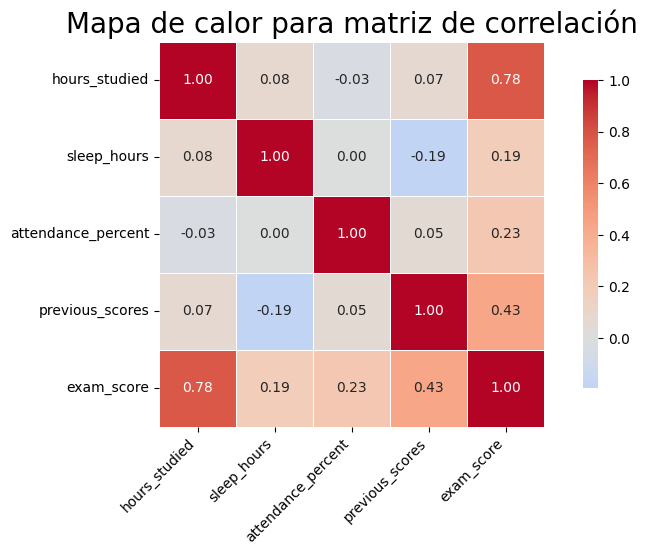

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. Cargar datos
# ===============================
df = pd.read_csv("https://raw.githubusercontent.com/leslie1506/ProyectoU1/refs/heads/main/student_exam_scores.csv")
print(df.head())

# ===============================
# 2. Variables dependiente e independiente
# ===============================
x = df["hours_studied"]
y = df["exam_score"]

# ===============================
# 3. Gráfico de dispersión
# ===============================
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, y, label="Scores", color="blue", s=40)
plt.xlabel("Hours Studied", fontsize=20)
plt.ylabel("Exam Score", fontsize=20)
plt.title("Gráfico de dispersión", color="#27F56C", fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.show()

# ===============================
# 4. Coeficiente de correlación
# ===============================
Sxx = ((x - x.mean())**2).sum()
Syy = ((y - y.mean())**2).sum()
Sxy = ((x - x.mean())*(y-y.mean())).sum()

from math import sqrt
r = Sxy/sqrt(Sxx*Syy)
print("Coeficiente de correlación =", round(r,4))
print("Coeficiente de correlación (forma fácil)=", df.corr(numeric_only=True))

from scipy.stats import pearsonr
print("Coeficiente de correlación:", pearsonr(x,y))
print("Coeficiente de determinación:", r**2)

# ===============================
# 5. Recta de regresión
# ===============================
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
print("Parámetros:", modelo.params)

yc = modelo.predict(x_constante)
plt.scatter(x, y, label="Datos", color="blue", s=40)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5, label="Recta ajustada")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Regresión Lineal")
plt.legend()
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,yc)
print("\nCoeficiente de determinación (R²) =", round(r2,4))

# ===============================
# 6. Intervalo de confianza
# ===============================
intervalo_de_confianza = modelo.conf_int(alpha=0.05)
print("\nIntervalo de confianza:\n", intervalo_de_confianza)

# ===============================
# 7. Gráfico de residuales
# ===============================
residuales = modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, residuales, label="Residuales", color="blue", s=20)
plt.xlabel("Hours Studied")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales", fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.axhline(y=0, color="gray", linestyle="--")
plt.show()

# ===============================
# 8. Test de normalidad (Shapiro)
# ===============================
from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro = shapiro(residuales)
print("Valor p (Shapiro) =", valor_p_shapiro)

# ===============================
# 9. Test de homocedasticidad (Breusch-Pagan)
# ===============================
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f"Valor p de Breusch-Pagan: {valor_p_bp:0.4f}\n")

# ===============================
# 10. Predicciones de ejemplo
# ===============================
print("Predicción para x=5:", modelo.predict([1,5]))
print("Predicción para x=8:", modelo.predict([1,8]))

# ===============================
# 11. ANOVA
# ===============================
from statsmodels.formula.api import ols
modelo_lineal = ols("exam_score ~ hours_studied", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print("\nANOVA:")
print(tabla_anova)

# ===============================
# 12. Mapa de calor de la matriz de correlación
# ===============================
matriz_de_correlacion = df.corr(numeric_only=True)

plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(
    matriz_de_correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink":0.8},
    center=0
)
plt.title("Mapa de calor para matriz de correlación", fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()